# Linear modelling: Road distance and map distance

## Summary

### Question of interest

### Data

Road, `float` :
road distance between two locations in Sheffield

Map, `float` :
map distance (ie, straight line) between two locations in Sheffield

### Method

- Data modelled using simple linear regression through the origin
- Data, model, and prediction intervals plotted
- Assumptions of the distribution of the residuals checked with a
  residual plot, normal probability plot, and hypothesis test
  $H_{0} : \beta = 0$

### Summary results

```python
results{'beta': 1.289, 'tstat_beta': 42.803, 'pval_beta': 0.000, "dof": 11}
```

### Discussion

### Output

<!--Add path to FinishingM248-->

### Reference

m248.c.act5

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import pandas as pd  # noqa: F401
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load, summarise  # noqa: E402

### Import the data

In [4]:
distance = load.Data.get("road_map_distance")
distance.head()

,id,type,distance
0,1,road,10.7
1,2,road,11.7
2,3,road,6.5
3,4,road,25.6
4,5,road,29.4


In [5]:
# check dtypes
distance.dtypes

id            int64
type         object
distance    float64
dtype: object

In [6]:
# get samples
distance.sort_values(by=["id", "type"], inplace=True)
X = distance.query('type == "map"')["distance"].to_numpy()
y = distance.query('type == "road"')["distance"].to_numpy()

### Model the data

In [7]:
model = sm.OLS(y, X).fit()

In [8]:
# get parameters
model.params[0]

1.2890716596160208

### Visualise the model

In [9]:
# get predicted vales and prediction interval
model.get_prediction()
predstd, pred_iv_l, pred_iv_u = wls_prediction_std(model)

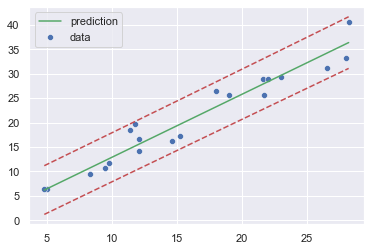

In [10]:
# plot data and model
sns.scatterplot(x=X, y=y, label="data")
sns.lineplot(x=X, y=model.predict(), color="g", label="prediction")
sns.lineplot(x=X, y=pred_iv_u, color="r", linestyle="--")
sns.lineplot(x=X, y=pred_iv_l, color="r", linestyle="--")
plt.show()

### Check assumptions of residual

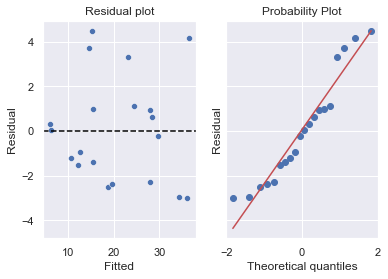

In [11]:
# residual plot and probability plot
f, axs = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(x=model.predict(), y=model.resid, ax=axs[0])
axs[0].set(xlabel="Fitted", ylabel="Residual", title="Residual plot")
axs[0].axhline(y=0, color="black", linestyle="--")
stats.probplot(x=model.resid, plot=axs[1])
axs[1].set(ylabel="Residual")
plt.show()

In [12]:
# hypoth test: beta = 0
summarise.TTest(model.tvalues[0], model.pvalues[0], len(model.resid)-2)

ResultSummary(tstat=42.803044, pval=0.000000, dof=18)